In [1]:
import pandas as pd
import matplotlib.pyplot as plt

url = pd.read_csv(r"https://raw.githubusercontent.com/bluenex/WekaLearningDataset/master/bank/bank-data.csv")
url

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,ID12101,48,FEMALE,INNER_CITY,17546.00,NO,1,NO,NO,NO,NO,YES
1,ID12102,40,MALE,TOWN,30085.10,YES,3,YES,NO,YES,YES,NO
2,ID12103,51,FEMALE,INNER_CITY,16575.40,YES,0,YES,YES,YES,NO,NO
3,ID12104,23,FEMALE,TOWN,20375.40,YES,3,NO,NO,YES,NO,NO
4,ID12105,57,FEMALE,RURAL,50576.30,YES,0,NO,YES,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...,...
595,ID12696,61,FEMALE,INNER_CITY,47025.00,NO,2,YES,YES,YES,YES,NO
596,ID12697,30,FEMALE,INNER_CITY,9672.25,YES,0,YES,YES,YES,NO,NO
597,ID12698,31,FEMALE,TOWN,15976.30,YES,0,YES,YES,NO,NO,YES
598,ID12699,29,MALE,INNER_CITY,14711.80,YES,0,NO,YES,NO,YES,NO


In [2]:
url.isnull().sum()

id             0
age            0
sex            0
region         0
income         0
married        0
children       0
car            0
save_act       0
current_act    0
mortgage       0
pep            0
dtype: int64

save_act: Conta poupança ("YES" ou "NO").
current_act: Conta corrente ("YES" ou "NO").
mortgage: Hipoteca ("YES" ou "NO").
pep: Produto de investimento pessoal adquirido ("YES" ou "NO").

In [3]:
url.describe()

,age,income,children
count,600.000000,600.000000,600.000000
mean,42.395000,27524.031217,1.011667
std,14.424947,12899.468246,1.056752
min,18.000000,5014.210000,0.000000
25%,30.000000,17264.500000,0.000000
50%,42.000000,24925.300000,1.000000
75%,55.250000,36172.675000,2.000000
max,67.000000,63130.100000,3.000000


In [4]:
dados_sex= url['sex'].value_counts()
dados_region=url['region'].value_counts()
dados_married= url['married'].value_counts()
dados_car= url['car'].value_counts()
dados_saveact= url['save_act'].value_counts()
dados_curret = url['current_act'].value_counts()
dados_mortgage= url['mortgage'].value_counts()
dados_pep= url['pep'].value_counts()

{'whiskers': [<matplotlib.lines.Line2D at 0x14c938bf790>,
 'caps': [<matplotlib.lines.Line2D at 0x14c938bfcd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x14c938bf4f0>],
 'medians': [<matplotlib.lines.Line2D at 0x14c938cb250>],
 'fliers': [<matplotlib.lines.Line2D at 0x14c938cb4f0>],
 'means': []}

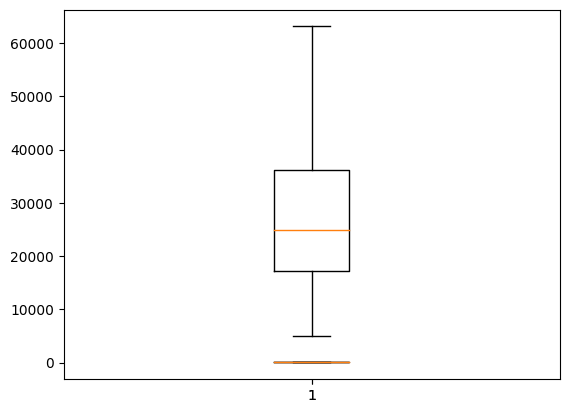

In [5]:
plt.boxplot([url['age']])
plt.boxplot([url['income']])

In [6]:
df_encoded = pd.get_dummies(url, columns=['sex'])
df_encoded

,id,age,region,income,married,children,car,save_act,current_act,mortgage,pep,sex_FEMALE,sex_MALE
0,ID12101,48,INNER_CITY,17546.00,NO,1,NO,NO,NO,NO,YES,True,False
1,ID12102,40,TOWN,30085.10,YES,3,YES,NO,YES,YES,NO,False,True
2,ID12103,51,INNER_CITY,16575.40,YES,0,YES,YES,YES,NO,NO,True,False
3,ID12104,23,TOWN,20375.40,YES,3,NO,NO,YES,NO,NO,True,False
4,ID12105,57,RURAL,50576.30,YES,0,NO,YES,NO,NO,NO,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,ID12696,61,INNER_CITY,47025.00,NO,2,YES,YES,YES,YES,NO,True,False
596,ID12697,30,INNER_CITY,9672.25,YES,0,YES,YES,YES,NO,NO,True,False
597,ID12698,31,TOWN,15976.30,YES,0,YES,YES,NO,NO,YES,True,False
598,ID12699,29,INNER_CITY,14711.80,YES,0,NO,YES,NO,YES,NO,False,True


In [7]:
df_encoded.drop('sex_MALE', axis=1, inplace=True)
df_encoded.rename(columns={'sex_FEMALE':'sex'}, inplace=True)

In [8]:
df_encoded

,id,age,region,income,married,children,car,save_act,current_act,mortgage,pep,sex
0,ID12101,48,INNER_CITY,17546.00,NO,1,NO,NO,NO,NO,YES,True
1,ID12102,40,TOWN,30085.10,YES,3,YES,NO,YES,YES,NO,False
2,ID12103,51,INNER_CITY,16575.40,YES,0,YES,YES,YES,NO,NO,True
3,ID12104,23,TOWN,20375.40,YES,3,NO,NO,YES,NO,NO,True
4,ID12105,57,RURAL,50576.30,YES,0,NO,YES,NO,NO,NO,True
...,...,...,...,...,...,...,...,...,...,...,...,...
595,ID12696,61,INNER_CITY,47025.00,NO,2,YES,YES,YES,YES,NO,True
596,ID12697,30,INNER_CITY,9672.25,YES,0,YES,YES,YES,NO,NO,True
597,ID12698,31,TOWN,15976.30,YES,0,YES,YES,NO,NO,YES,True
598,ID12699,29,INNER_CITY,14711.80,YES,0,NO,YES,NO,YES,NO,False


In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
# Ajuste e transformação dos dados
df_encoded['region_E'] = label_encoder.fit_transform(df_encoded['region'])
df_encoded['married_E'] =label_encoder.fit_transform(df_encoded['married'])
df_encoded['save_act_E']=label_encoder.fit_transform(df_encoded['save_act'])
df_encoded['current_act_E']=label_encoder.fit_transform(df_encoded['current_act'])
df_encoded['car_E']=label_encoder.fit_transform(df_encoded['car'])
df_encoded['mortgage_E']=label_encoder.fit_transform(df_encoded['mortgage'])
df_encoded['pep_E']=label_encoder.fit_transform(df_encoded['pep'])
df_encoded['sex_E']=label_encoder.fit_transform(df_encoded['sex'])
df_encoded['income_E']= label_encoder.fit_transform(df_encoded['income'])

In [10]:
df=df_encoded.drop(['age','id','income','region','married','car','save_act','mortgage','pep','sex','current_act'], axis=1, inplace=True)

In [11]:
df=df_encoded

In [12]:
df

,children,region_E,married_E,save_act_E,current_act_E,car_E,mortgage_E,pep_E,sex_E,income_E
0,1,0,0,0,0,0,0,1,1,155
1,3,3,1,0,1,1,1,0,0,385
2,0,0,1,1,1,1,0,0,1,136
3,3,3,1,0,1,0,0,0,1,203
4,0,1,1,1,0,0,0,0,1,557
...,...,...,...,...,...,...,...,...,...,...
595,2,0,0,1,1,1,1,0,1,537
596,0,0,1,1,1,1,0,0,1,22
597,0,3,1,1,0,1,0,1,1,122
598,0,0,1,1,0,0,1,0,0,98


In [13]:
from sklearn.preprocessing import StandardScaler

# Criando o scaler
scaler = StandardScaler()

# Ajustando e transformando os dados
df['income_E'] = scaler.fit_transform(df[['income_E']])
#df['age'] = scaler.fit_transform(df[['age']])
#df['children']= scaler.fit_transform(df[['children']])
df

,children,region_E,married_E,save_act_E,current_act_E,car_E,mortgage_E,pep_E,sex_E,income_E
0,1,0,0,0,0,0,0,1,1,-0.834449
1,3,3,1,0,1,1,1,0,0,0.495611
2,0,0,1,1,1,1,0,0,1,-0.944323
3,3,3,1,0,1,0,0,0,1,-0.556871
4,0,1,1,1,0,0,0,0,1,1.490265
...,...,...,...,...,...,...,...,...,...,...
595,2,0,0,1,1,1,1,0,1,1.374608
596,0,0,1,1,1,1,0,0,1,-1.603571
597,0,3,1,1,0,1,0,1,1,-1.025284
598,0,0,1,1,0,0,1,0,0,-1.164073


In [14]:
corr=df.corr()
corr

,children,region_E,married_E,save_act_E,current_act_E,car_E,mortgage_E,pep_E,sex_E,income_E
children,1.000000,0.011520,-0.048716,0.041536,0.006238,0.036455,-0.074339,-0.057663,0.014206,0.030159
region_E,0.011520,1.000000,0.006188,0.084382,-0.013356,0.021860,0.026083,-0.027279,0.035018,0.014811
married_E,-0.048716,0.006188,1.000000,0.028604,-0.059996,-0.009571,-0.021711,-0.189578,-0.021110,-0.006744
save_act_E,0.041536,0.084382,0.028604,1.000000,0.042511,0.034310,-0.001588,-0.072779,-0.007207,0.230551
current_act_E,0.006238,-0.013356,-0.059996,0.042511,1.000000,-0.034783,-0.036704,0.025141,0.019466,0.017201
car_E,0.036455,0.021860,-0.009571,0.034310,-0.034783,1.000000,-0.007743,0.018917,-0.006667,0.098244
mortgage_E,-0.074339,0.026083,-0.021711,-0.001588,-0.036704,-0.007743,1.000000,-0.024182,-0.066465,0.000769
pep_E,-0.057663,-0.027279,-0.189578,-0.072779,0.025141,0.018917,-0.024182,1.000000,-0.046843,0.211267
sex_E,0.014206,0.035018,-0.021110,-0.007207,0.019466,-0.006667,-0.066465,-0.046843,1.000000,0.023768
income_E,0.030159,0.014811,-0.006744,0.230551,0.017201,0.098244,0.000769,0.211267,0.023768,1.000000


<Axes: >

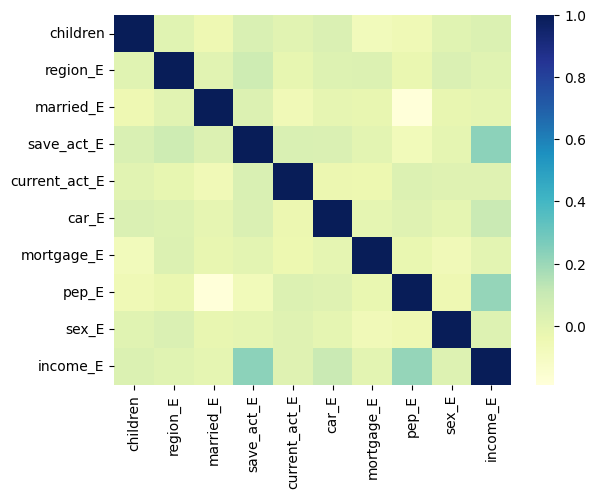

In [15]:
import seaborn as sns
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap="YlGnBu")


In [16]:
y = df['pep_E']
X = df.drop('pep_E',axis = 1)
X

,children,region_E,married_E,save_act_E,current_act_E,car_E,mortgage_E,sex_E,income_E
0,1,0,0,0,0,0,0,1,-0.834449
1,3,3,1,0,1,1,1,0,0.495611
2,0,0,1,1,1,1,0,1,-0.944323
3,3,3,1,0,1,0,0,1,-0.556871
4,0,1,1,1,0,0,0,1,1.490265
...,...,...,...,...,...,...,...,...,...
595,2,0,0,1,1,1,1,1,1.374608
596,0,0,1,1,1,1,0,1,-1.603571
597,0,3,1,1,0,1,0,1,-1.025284
598,0,0,1,1,0,0,1,0,-1.164073


In [17]:
from sklearn.model_selection import train_test_split

# Definindo os conjuntos de treino e teste, onde x é o conjunto de atributos (features que são nossas variáveis preditoras) e y é a variável alvo.
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [18]:
from sklearn.linear_model import LogisticRegression
modelo = LogisticRegression() 
modelo.fit(x_train , y_train)

LogisticRegression()

In [19]:
y_pred = modelo.predict(x_test)

#Verificação de Acurácia
resultado = modelo.score(x_test, y_test)
print ("Acurácia:", resultado)

Acurácia: 0.5722222222222222


In [20]:
from sklearn.metrics import confusion_matrix, classification_report

"""
Calculando e exibindo a matriz de confusão. A orientação padrão é a seguinte:
[0,0]: Verdadeiros Negativos (VN) - Previsões corretamente identificadas como negativas.
[0,1]: Falsos Positivos (FP) - Previsões incorretamente identificadas como positivas.
[1,0]: Falsos Negativos (FN) - Previsões incorretamente identificadas como negativas.
[1,1]: Verdadeiros Positivos (VP) - Previsões corretamente identificadas como positivas.
"""

conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(conf_matrix)

Matriz de Confusão:
[[65 33]
 [44 38]]


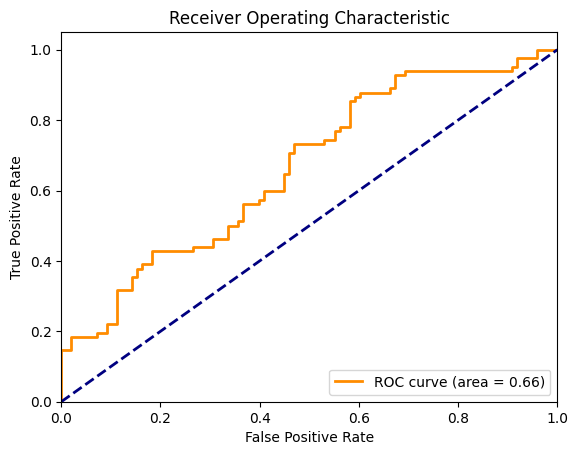

In [21]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Prever as probabilidades para os dados de teste.
# Note que estamos interessados nas probabilidades da classe positiva (1), então usamos [:, 1].
y_probs = modelo.predict_proba(x_test)[:, 1]

# Calcular FPR, TPR, e limiares
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calcular a AUC
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [22]:
import pandas as pd
import numpy as np
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

param_distributions = {
    "logisticregression__penalty": ['none', 'l2'],
    "logisticregression__solver": ['lbfgs', 'newton-cg', 'sag', 'saga','newton-cholesky'],
    "logisticregression__max_iter": randint(1, 500)
}

# Criando um pipeline que inclui a normalização dos dados e a regressão logística
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logisticregression', LogisticRegression())
])

# Configurando o RandomizedSearchCV
random_search = RandomizedSearchCV(pipeline, param_distributions, n_iter=150, cv=10, scoring='accuracy', n_jobs=-1, random_state=42)

# Ajustando o RandomizedSearchCV aos dados de treino
random_search.fit(x_train, y_train)

# Obtendo os melhores parâmetros e a melhor pontuação
best_params = random_search.best_params_
best_score = random_search.best_score_

print(f"Melhores Parâmetros: {best_params}")
print(f"Melhor Pontuação: {best_score}")

# Avaliando o modelo nos dados de teste
y_pred = random_search.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy no conjunto de teste: {accuracy}")

# Exibindo o relatório de classificação
print(classification_report(y_test, y_pred))

# Exibindo os resultados do RandomizedSearchCV
results = pd.DataFrame(random_search.cv_results_)
print(results.head())

Melhores Parâmetros: {'logisticregression__max_iter': 6, 'logisticregression__penalty': 'none', 'logisticregression__solver': 'saga'}
Melhor Pontuação: 0.6
Accuracy no conjunto de teste: 0.5833333333333334
              precision    recall  f1-score   support

           0       0.61      0.67      0.64        98
           1       0.55      0.48      0.51        82

    accuracy                           0.58       180
   macro avg       0.58      0.57      0.57       180
weighted avg       0.58      0.58      0.58       180

   mean_fit_time  std_fit_time  mean_score_time  std_score_time   
0       0.134043      0.000000         0.017182        0.004690  \
1       0.041847      0.046471         0.005937        0.005708   
2       0.049592      0.005865         0.006283        0.000780   
3       0.015252      0.017969         0.003237        0.006201   
4       0.006248      0.007653         0.006248        0.007653   

  param_logisticregression__max_iter param_logisticregression__p

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [23]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

param_distributions = {
    "logisticregression__penalty": ['none', 'l2'],
    "logisticregression__solver": ['lbfgs', 'newton-cg', 'sag', 'saga','newton-cholesky'],
    "logisticregression__max_iter": Integer(50, 500)
}


pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logisticregression', LogisticRegression())
])

# Configurando o BayesSearchCV
bayes_search = BayesSearchCV(
    estimator=pipeline,
    search_spaces=param_distributions,
    n_iter=50,  # número de iterações
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

# Ajustando o BayesSearchCV aos dados de treino
bayes_search.fit(x_train, y_train)

# Obtendo os melhores parâmetros e a melhor pontuação
best_params = bayes_search.best_params_
best_score = bayes_search.best_score_

print(f"Melhores Parâmetros: {best_params}")
print(f"Melhor Pontuação: {best_score}")

# Avaliando o modelo nos dados de teste
y_pred = bayes_search.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy no conjunto de teste: {accuracy}")

# Exibindo o relatório de classificação
print(classification_report(y_test, y_pred))

# Exibindo os resultados do BayesSearchCV
results = pd.DataFrame(bayes_search.cv_results_)
print(results.head())

Melhores Parâmetros: OrderedDict([('logisticregression__max_iter', 235), ('logisticregression__penalty', 'l2'), ('logisticregression__solver', 'newton-cholesky')])
Melhor Pontuação: 0.6047619047619048
Accuracy no conjunto de teste: 0.5722222222222222
              precision    recall  f1-score   support

           0       0.60      0.66      0.63        98
           1       0.54      0.46      0.50        82

    accuracy                           0.57       180
   macro avg       0.57      0.56      0.56       180
weighted avg       0.57      0.57      0.57       180

   mean_fit_time  std_fit_time  mean_score_time  std_score_time   
0       0.005174      0.000270         0.001880        0.000750  \
1       0.006782      0.000399         0.001802        0.000403   
2       0.005193      0.000396         0.001402        0.000496   
3       0.007949      0.000902         0.001995        0.000630   
4       0.005591      0.001411         0.000000        0.000000   

  param_logisticreg

In [24]:
param_grid = {
    "logisticregression__penalty": ['none', 'l2'],
    "logisticregression__solver": ['saga','newton-cholesky',],
    "logisticregression__max_iter": [1,2,3,4,5,6]}

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logisticregression', LogisticRegression())
])
# Configurando o GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# Treinando o GridSearchCV
grid_search.fit(x_train, y_train)

# Melhores parâmetros e score
print("Melhores Parâmetros:", grid_search.best_params_)
print("Melhor score de acurácia:", grid_search.best_score_)

Melhores Parâmetros: {'logisticregression__max_iter': 4, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'saga'}
Melhor score de acurácia: 0.6285714285714286


D:\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


# Arvore de decisão

In [25]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

max_depth = 5
min_samples= 2
clf = DecisionTreeClassifier(min_samples_split=min_samples,max_depth=max_depth, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [26]:
y_pred = clf.predict(X_test)

In [27]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.2f}")

# Relatório de classificação
print(classification_report(y_test, y_pred))

# Matriz de confusão
print(confusion_matrix(y_test, y_pred))

Acurácia: 0.83
              precision    recall  f1-score   support

           0       0.79      0.91      0.85        93
           1       0.89      0.74      0.81        87

    accuracy                           0.83       180
   macro avg       0.84      0.82      0.83       180
weighted avg       0.84      0.83      0.83       180

[[85  8]
 [23 64]]


In [28]:
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)


train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"Acurácia no Treinamento: {train_accuracy:.2f}")
print(f"Acurácia no Teste: {test_accuracy:.2f}")

Acurácia no Treinamento: 0.87
Acurácia no Teste: 0.83


In [29]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalizar os dados
    ('classifier', DecisionTreeClassifier())  # Classificador
])

param_distributions = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__splitter': ['best', 'random'],
    'classifier__max_depth': np.arange(1, 20),
    'classifier__min_samples_split': np.arange(2, 20),
    'classifier__min_samples_leaf': np.arange(1, 20)
}

# 4. Configurar e executar o RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=50,  # Número de iterações
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

# Treinando o RandomizedSearchCV
random_search.fit(X_train, y_train)

# 5. Avaliar os resultados
print("Melhores Parâmetros:", random_search.best_params_)
print("Melhor Score de Validação:", random_search.best_score_)

# Prever nos dados de teste
y_pred = random_search.predict(X_test)

# Avaliar a acurácia e exibir o relatório de classificação
print("Acurácia no Teste:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Melhores Parâmetros: {'classifier__splitter': 'best', 'classifier__min_samples_split': 8, 'classifier__min_samples_leaf': 10, 'classifier__max_depth': 18, 'classifier__criterion': 'gini'}
Melhor Score de Validação: 0.8666666666666666
Acurácia no Teste: 0.8222222222222222
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        93
           1       0.88      0.74      0.80        87

    accuracy                           0.82       180
   macro avg       0.83      0.82      0.82       180
weighted avg       0.83      0.82      0.82       180



In [30]:
param_distributions = {
    'classifier__criterion': Categorical(['gini', 'entropy']),
    'classifier__splitter': Categorical(['best', 'random']),
    'classifier__max_depth': Integer(1, 20),
    'classifier__min_samples_split': Integer(2, 20),
    'classifier__min_samples_leaf': Integer(1, 20)
}

# 4. Configurar e executar o BayesSearchCV
bayes_search = BayesSearchCV(
    estimator=pipeline,
    search_spaces=param_distributions,
    n_iter=50,  # Número de iterações
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

# Treinando o BayesSearchCV
bayes_search.fit(X_train, y_train)

# 5. Avaliar os resultados
print("Melhores Parâmetros:", bayes_search.best_params_)
print("Melhor Score de Validação:", bayes_search.best_score_)

# Prever nos dados de teste
y_pred = bayes_search.predict(X_test)

# Avaliar a acurácia e exibir o relatório de classificação
print("Acurácia no Teste:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

D:\Anaconda\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point ['entropy', 20, 8, 20, 'best'] before, using random point ['entropy', 2, 2, 16, 'best']
  warnings.warn(
D:\Anaconda\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point ['entropy', 20, 8, 20, 'best'] before, using random point ['gini', 11, 18, 17, 'best']
  warnings.warn(


Melhores Parâmetros: OrderedDict([('classifier__criterion', 'entropy'), ('classifier__max_depth', 20), ('classifier__min_samples_leaf', 6), ('classifier__min_samples_split', 2), ('classifier__splitter', 'best')])
Melhor Score de Validação: 0.869047619047619
Acurácia no Teste: 0.85
              precision    recall  f1-score   support

           0       0.82      0.91      0.86        93
           1       0.89      0.78      0.83        87

    accuracy                           0.85       180
   macro avg       0.86      0.85      0.85       180
weighted avg       0.85      0.85      0.85       180



In [31]:
param_grid = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__splitter': ['best', 'random'],
    'classifier__max_depth': [5,10, 15,18],
    'classifier__min_samples_split': [4,8,17,20],
    'classifier__min_samples_leaf': [10]
}

# 4. Configurar e executar o GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Treinando o GridSearchCV
grid_search.fit(X_train, y_train)

# 5. Avaliar os resultados
print("Melhores Parâmetros:", grid_search.best_params_)
print("Melhor Score de Validação:", grid_search.best_score_)

# Prever nos dados de teste
y_pred = grid_search.predict(X_test)

# Avaliar a acurácia e exibir o relatório de classificação
print("Acurácia no Teste:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Melhores Parâmetros: {'classifier__criterion': 'gini', 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 10, 'classifier__min_samples_split': 4, 'classifier__splitter': 'best'}
Melhor Score de Validação: 0.8666666666666666
Acurácia no Teste: 0.8222222222222222
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        93
           1       0.88      0.74      0.80        87

    accuracy                           0.82       180
   macro avg       0.83      0.82      0.82       180
weighted avg       0.83      0.82      0.82       180



# KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsClassifier(n_neighbors=5)  # Usando 5 vizinhos
knn.fit(X_train, y_train)
model_knn = KNeighborsRegressor()
# 5. Fazer previsões e avaliar o modelo
y_pred = knn.predict(X_test)

# Avaliar a acurácia e exibir o relatório de classificação
print("Acurácia no Teste:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Matriz de confusão
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))

Acurácia no Teste: 0.7222222222222222
              precision    recall  f1-score   support

           0       0.71      0.78      0.74        93
           1       0.74      0.66      0.70        87

    accuracy                           0.72       180
   macro avg       0.72      0.72      0.72       180
weighted avg       0.72      0.72      0.72       180

Matriz de Confusão:
 [[73 20]
 [30 57]]


In [38]:
# Definindo o espaço de busca para os hiperparâmetros
param_dist = {
    'n_neighbors': np.arange(1, 21, 1),  # Número de vizinhos de 1 a 20
    'weights': ['uniform', 'distance'],  # Tipo de peso
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Métrica de distância
}

# Criando o objeto RandomizedSearchCV
random_search_knn = RandomizedSearchCV(estimator=model_knn, param_distributions=param_dist, n_iter=30, cv=5, random_state=42)

# Realizando a busca aleatória pelos melhores hiperparâmetros
random_search_knn.fit(X_train, y_train)

# Melhores hiperparâmetros encontrados
print("Melhores Hiperparâmetros:")
print(random_search_knn.best_params_)

# Melhor score encontrado durante a validação cruzada
print("Melhor Score durante a Validação Cruzada:")
print(random_search_knn.best_score_)

# Avaliando o modelo nos dados de teste
test_score = random_search_knn.score(X_test, y_test)
print("Score nos Dados de Teste:")
print(test_score)

Melhores Hiperparâmetros:
{'weights': 'distance', 'n_neighbors': 13, 'metric': 'manhattan'}
Melhor Score durante a Validação Cruzada:
0.33130427789881206
Score nos Dados de Teste:
0.33704029034049143


In [39]:
param_space = {
    'n_neighbors': Integer(1, 20),  # Número de vizinhos
    'weights': Categorical(['uniform', 'distance']),  # Tipo de peso
    'metric': Categorical(['euclidean', 'manhattan', 'minkowski'])  # Métrica de distância
}

# Criando o objeto BayesSearchCV
bayes_search_knn = BayesSearchCV(estimator=model_knn, search_spaces=param_space, n_iter=30, cv=5, random_state=42)

# Realizando a busca bayesiana pelos melhores hiperparâmetros
bayes_search_knn.fit(X_train, y_train)

# Melhores hiperparâmetros encontrados
print("Melhores Hiperparâmetros:")
print(bayes_search_knn.best_params_)

# Melhor score encontrado durante a validação cruzada
print("Melhor Score durante a Validação Cruzada:")
print(bayes_search_knn.best_score_)

# Avaliando o modelo nos dados de teste
test_score = bayes_search_knn.score(X_test, y_test)
print("Score nos Dados de Teste:")
print(test_score)

Melhores Hiperparâmetros:
OrderedDict([('metric', 'manhattan'), ('n_neighbors', 11), ('weights', 'distance')])
Melhor Score durante a Validação Cruzada:
0.33470505596495503
Score nos Dados de Teste:
0.3442454520064836


In [41]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
grid_search_knn = GridSearchCV(estimator=model_knn, param_grid=param_grid, cv=5)


grid_search_knn.fit(X_train, y_train)


print("Melhores Parâmetros:", grid_search.best_params_)
print("Melhor Score de Validação:", grid_search.best_score_)

# Prever nos dados de teste
y_pred = grid_search.predict(X_test)

# Avaliar a acurácia e exibir o relatório de classificação
print("Acurácia no Teste:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Melhores Parâmetros: {'classifier__criterion': 'gini', 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 10, 'classifier__min_samples_split': 4, 'classifier__splitter': 'best'}
Melhor Score de Validação: 0.8666666666666666
Acurácia no Teste: 0.8222222222222222
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        93
           1       0.88      0.74      0.80        87

    accuracy                           0.82       180
   macro avg       0.83      0.82      0.82       180
weighted avg       0.83      0.82      0.82       180

